# Identification &  Analysis of the Significant Increase in New York City's Non-emergency Complaints   

## Problem Statement
 The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their questions:

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?

Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?

Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

Your organization has assigned you as the lead data scientist to provide the answers to these questions. You need to work on getting answers to them in this Capstone Project by following the standard approach of data science and machine learning


<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#i">Imports</a></li>
    <li><a href="#i">Data Exploration</a></li>
    <li><a href="#Identify Top Complaint Types">Identify Top Complaint Types </a></li>
    <li><a href="#Identify the Most Affected Areas">Identify the Most Affected Areas</a></li>
    <li><a href="#Identify the Relationship between Building Characteristics and Number of Complaints">Identify the Relationship between Building Characteristics and Top Complaint Types</a></li>

</ol>

</div>
 
<hr>

<h2 id="import_dataset">1. Import Datasets </h2>

####  Two datasets will be used from the Department of Housing Preservation and Development of New York City:
#### 1- 311 complaint dataset 
- data will have complaints submitted between 2010 and 2020.
- Use SODA URL of NYC311 dataset to ingest the data only for the Department of Housing Preservation and Development, which is identified as HPD in Agency column.
- Specify the total number of rows as 10 million so that you can download all the complaint data related to HPD.

#### 2- PLUTO dataset for housing
- Contains five CSV files for the five New York city boroughs: Bronx, Brooklyn, Manhattan, Queens, and Staten Island.

In [1]:
import os
# to interact with the operating system 

import pandas as pd
# data structure tool for data manipulation and analysis

import numpy as np
# for array and matrices processing 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
%config InlineBackend.figure_format='retina'
# for data visualization


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload 311 complaint dataset and store in dataframe
file_311 = pd.read_csv('311_Service_Requests_from_2010_to_Present_min.csv')
file_311.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [3]:
# Upload 311 complaint dataset and store in dataframe
PLUTO_Bronx = pd.read_csv('BX_18v1.csv')
PLUTO_Brooklyn = pd.read_csv('BK_18v1.csv')
PLUTO_Manhattan = pd.read_csv('MN_18v1.csv')
PLUTO_Queens = pd.read_csv('QN_18v1.csv')
PLUTO_Staten_Island = pd.read_csv('SI_18v1.csv')

<h2 id="Identify Top Complaint Types">2. Data Exploration </h2>

In [4]:
# to get the date range in which complaints are logged 
# list the data types for each column
print(file_311.dtypes)

Unnamed: 0                  int64
Unique Key                  int64
Created Date               object
Closed Date                object
Complaint Type             object
Location Type              object
Incident Zip              float64
Incident Address           object
Street Name                object
Address Type               object
City                       object
Status                     object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object


In [5]:
# convert created date from object to date fromat
file_311['Created Date'] = pd.to_datetime(file_311['Created Date'])

In [6]:
print ("The dataset contains complaints logged since :" , file_311['Created Date'].max() , "to:" ,file_311['Created Date'].min() )   

The dataset contains complaints logged since : 2020-02-02 23:58:57 to: 2010-01-01 00:00:00


In [7]:
# How many incidents have valid and missing Incident Address in file_311 system file?
print (" The dataset contains: " , file_311['Incident Address'].nunique() , "valid Incident Address" )
print (" The dataset contains: " , file_311['Incident Address'].isnull().sum() , "missing Incident Address" )

 The dataset contains:  182600 valid Incident Address
 The dataset contains:  52825 missing Incident Address


In [8]:
# How many valid ZIP Codes exist in the PLUTO dataset?
print ("There are " , PLUTO_Bronx['ZipCode'].nunique(), "valid ZIP code exist in the Bronx PLUTO dataset" )
print ("There are " , PLUTO_Brooklyn['ZipCode'].nunique(), "valid ZIP code exist in the Brooklyn PLUTO dataset" )
print ("There are " , PLUTO_Manhattan['ZipCode'].nunique(), "valid ZIP code exist in the Manhattan PLUTO dataset" )
print ("There are " , PLUTO_Queens['ZipCode'].nunique(), "valid ZIP code exist in the Queens PLUTO dataset" )
print ("There are " , PLUTO_Staten_Island['ZipCode'].nunique(), "valid ZIP code exist in the Staten_Island PLUTO dataset" )

There are  26 valid ZIP code exist in the Bronx PLUTO dataset
There are  41 valid ZIP code exist in the Brooklyn PLUTO dataset
There are  72 valid ZIP code exist in the Manhattan PLUTO dataset
There are  65 valid ZIP code exist in the Queens PLUTO dataset
There are  12 valid ZIP code exist in the Staten_Island PLUTO dataset


<h2 id="Identify Top Complaint Types">3. Identify Top Complaint Types </h2>

In [9]:
# What is the total number of complaints that exist in the dataset?
print( "There are :"  ,  file_311['Unique Key'].value_counts().sum(), " complaints exist in dataset")

There are : 6019843  complaints exist in dataset


In [10]:
print (" The dataset contains: " , file_311['Complaint Type'].isnull().sum() , "missing complaint type" )

 The dataset contains:  0 missing complaint type


In [11]:
# How many differnt Complaint Types can you find in the dataset?
print ( "There are : " , file_311['Complaint Type'].nunique(dropna = True) , "different complaint types in the dataset")

There are :  30 different complaint types in the dataset


In [12]:
# get top 10 Complaint types
Complaint_type = file_311['Complaint Type'].value_counts().reset_index()
Complaint_type.sorted = Complaint_type.sort_values(by = 'Complaint Type', ascending=False)
top_10_complaint = Complaint_type.sorted.nlargest(10, columns=['Complaint Type']).reset_index(drop = True)
top_10_complaint.rename(columns = {'index':'Complaint Types' , 'Complaint Type' : 'Number of Complaint'}, inplace = True)
top_10_complaint

,Complaint Types,Number of Complaint
0,HEAT/HOT WATER,1261574
1,HEATING,887850
2,PLUMBING,711130
3,GENERAL CONSTRUCTION,500863
4,UNSANITARY CONDITION,451643
5,PAINT - PLASTER,361257
6,PAINT/PLASTER,346438
7,ELECTRIC,307310
8,NONCONST,260890
9,DOOR/WINDOW,205278


In [13]:
# Using 800,000 as a threshold, what complaint type(s) do you recommend the Department of Housing Preservation and Development of New York City address first?
Total_Number_of_Complait = file_311['Complaint Type'].value_counts().to_frame()
Total_Number_of_Complait[Total_Number_of_Complait['Complaint Type']> 800000]

,Complaint Type
HEAT/HOT WATER,1261574
HEATING,887850


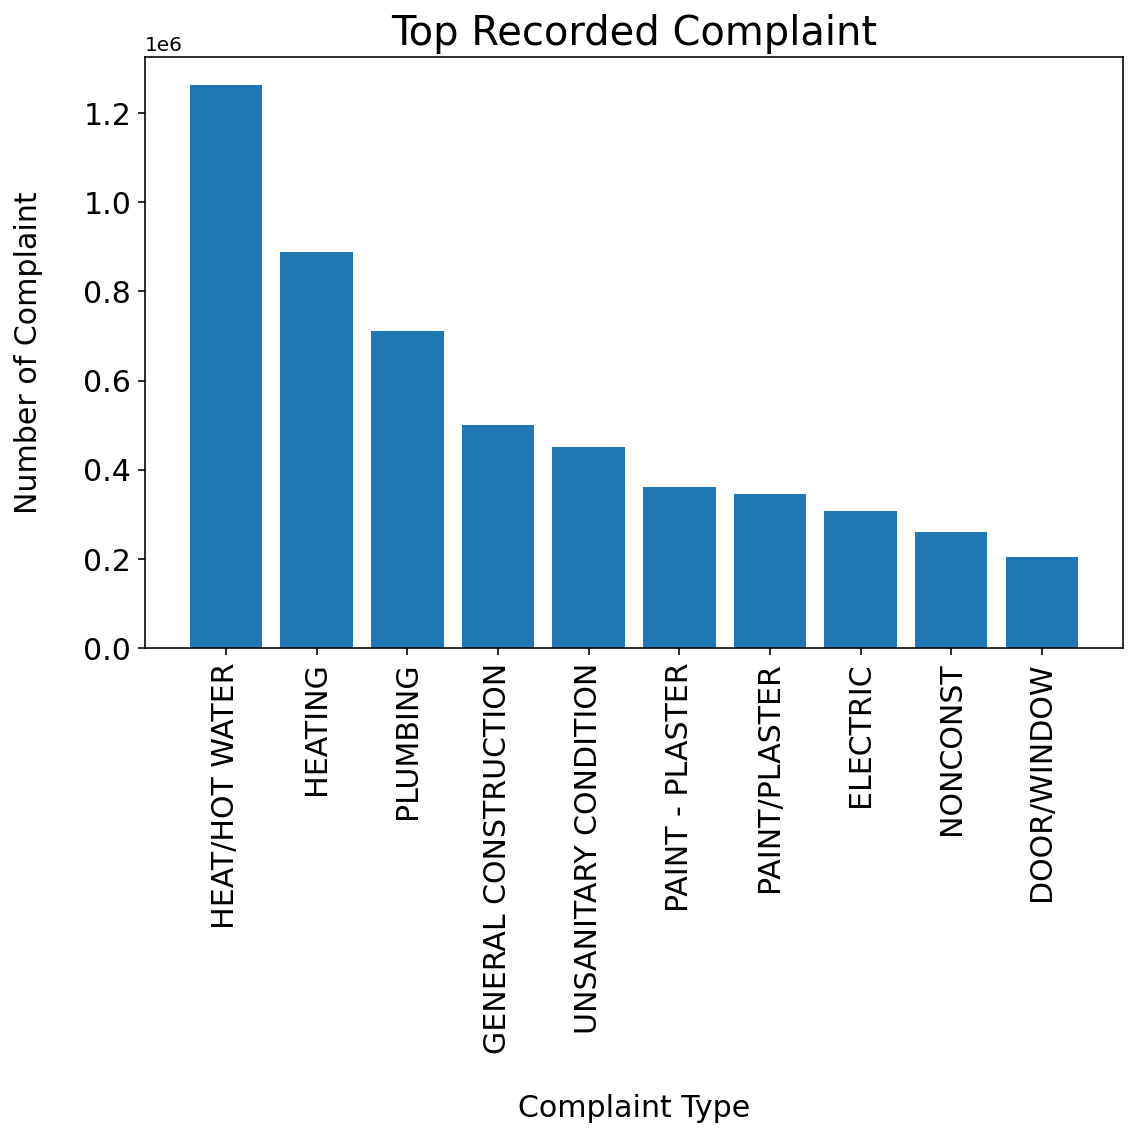

In [14]:
plt.rcParams['figure.figsize'] = (8, 8)

fig, ax = plt.subplots()

ax.bar(x=top_10_complaint['Complaint Types'] , height=top_10_complaint['Number of Complaint'], width=0.8, tick_label= None)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15 , rotation = 90)
plt.xlabel('Complaint Type' ,labelpad= 20, loc = 'center' ,fontsize = 15)
plt.ylabel('Number of Complaint' ,labelpad= 20, loc = 'center', fontsize = 15)
plt.title('Top Recorded Complaint', fontsize = 20 )
# Make the chart fill out the figure better.
fig.tight_layout()

In [15]:
 # add percentage column
top_10_complaint['percent'] = (top_10_complaint['Number of Complaint'] / top_10_complaint['Number of Complaint'].sum()) * 100 
top_10_complaint

,Complaint Types,Number of Complaint,percent
0,HEAT/HOT WATER,1261574,23.829212
1,HEATING,887850,16.770135
2,PLUMBING,711130,13.432163
3,GENERAL CONSTRUCTION,500863,9.460539
4,UNSANITARY CONDITION,451643,8.530849
5,PAINT - PLASTER,361257,6.823595
6,PAINT/PLASTER,346438,6.543686
7,ELECTRIC,307310,5.804618
8,NONCONST,260890,4.927815
9,DOOR/WINDOW,205278,3.877389


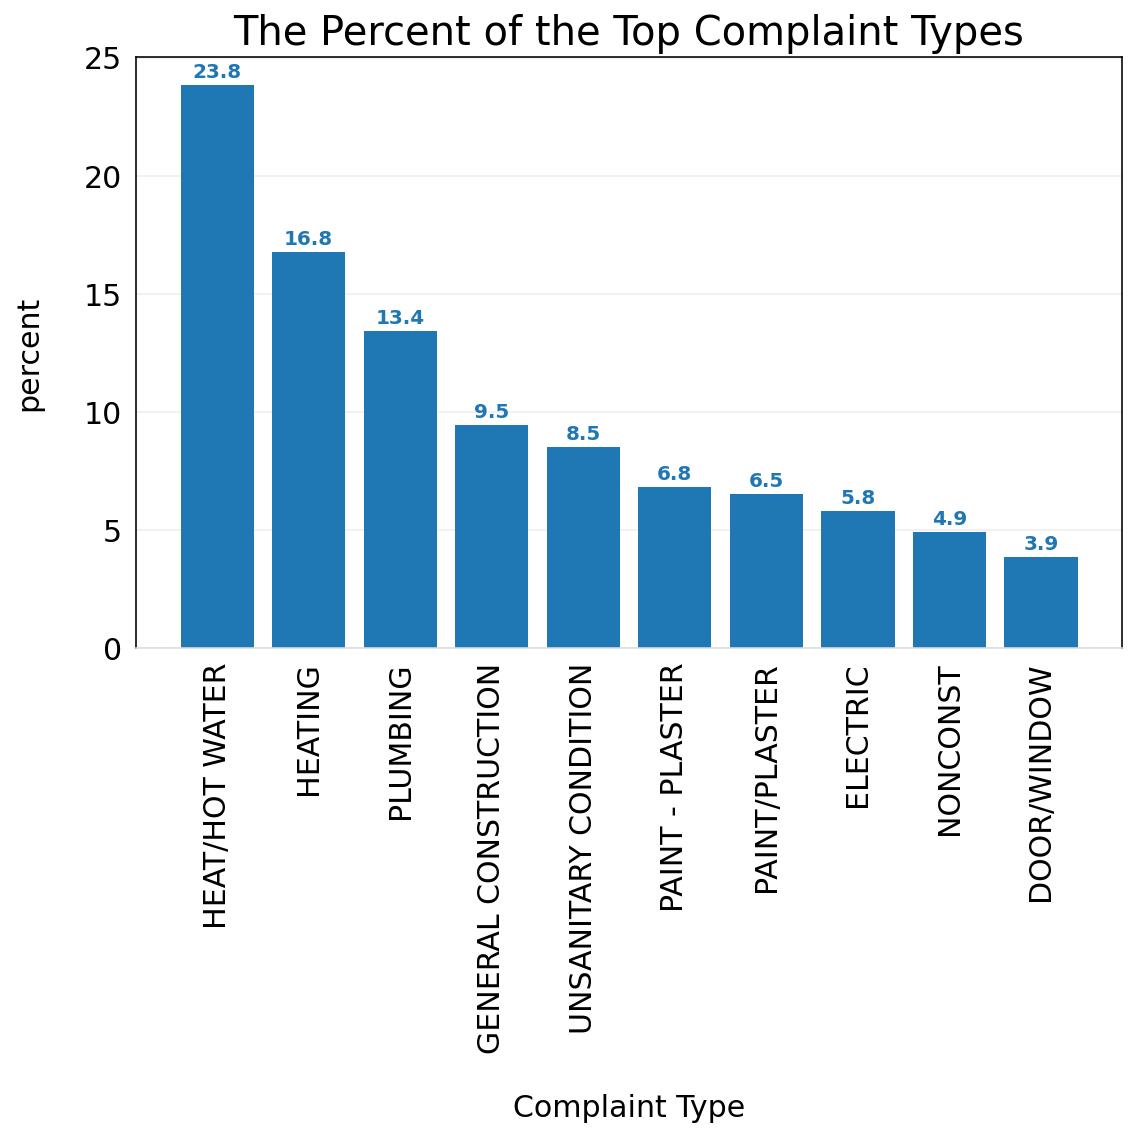

In [16]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = plt.subplots()
bars = ax.bar(x=top_10_complaint['Complaint Types'] , height=top_10_complaint['percent'], width=0.8, tick_label= None)



# Save the chart so we can loop through the bars below.

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15 , rotation = 90)
plt.xlabel('Complaint Type' ,labelpad= 20, loc = 'center' ,fontsize = 15)
plt.ylabel('percent' ,labelpad= 20, loc = 'center', fontsize = 15)
plt.title('The Percent of the Top Complaint Types', fontsize = 20 )
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
# Grab the color of the bars so we can make the
# text the same color.
bar_color = bars[0].get_facecolor()

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar_color,
      weight='bold'
  )
# Make the chart fill out the figure better.
fig.tight_layout()

<h2 id="Identify the Most Affected Areas">4. Identify the Most Affected Areas </h2>

In [17]:
# For the top two complaint types we selected, which borough had the highest number of complaints submitted?
# create a new data frame for areas data (city, zip code, and address)
cols = ['Complaint Type','City' , 'Incident Zip', 'Closed Date','Incident Address']
filt_by_city = file_311[cols]
# filter the new data frame by the top complaint types
complaint = [ 'HEAT/HOT WATER','HEATING']
compl_filt = filt_by_city[filt_by_city['Complaint Type'].isin(complaint)]
compl_filt.head()

,Complaint Type,City,Incident Zip,Closed Date,Incident Address
0,HEAT/HOT WATER,NEW YORK,10019.0,NaN,426 WEST 52 STREET
2,HEAT/HOT WATER,Jackson Heights,11372.0,NaN,87-15 37 AVENUE
3,HEAT/HOT WATER,BRONX,10458.0,NaN,2405 SOUTHERN BOULEVARD
5,HEAT/HOT WATER,BRONX,10456.0,NaN,1131 MORRIS AVENUE
7,HEAT/HOT WATER,Jackson Heights,11372.0,NaN,37-20 81 STREET


In [18]:
print ("The most affected city  by the top complaint types is :",compl_filt['City'].value_counts().nlargest(1) )
print("")
print ("The lowest affected city  by the top complaint types is :",compl_filt['City'].value_counts().nsmallest(1) )

The most affected city  by the top complaint types is : BRONX    688741
Name: City, dtype: int64

The lowest affected city  by the top complaint types is : NEW HYDE PARK    5
Name: City, dtype: int64


In [19]:
print ("zip code that had the highest submitted complant was :" ,compl_filt['Incident Zip'].value_counts().nlargest(1))
print("")
print ("The address that had the highest submitted complant was :" ,compl_filt['Incident Address'].value_counts().nlargest(1))

zip code that had the highest submitted complant was : 11226.0    69041
Name: Incident Zip, dtype: int64

The address that had the highest submitted complant was : 34 ARDEN STREET    13858
Name: Incident Address, dtype: int64


In [20]:
# For the top two complaint types, how many of the submitted tickets were closed?
# drop the missing closed data values 
compl_filt.dropna(subset=["Closed Date"], axis=0, inplace=True)
compl_filt.reset_index(drop=True, inplace=True)
print (" For the top complaint types" , compl_filt['Closed Date'].value_counts().sum() , "complaints were closed" )

 For the top complaint types 2133429 complaints were closed


<h2 id="Identify the Relationship between Building Characteristics and Top Complaint Types">5. Identify the Relationship between Building Characteristics and Number of Complaints </h2>

In [21]:
# credentiality check
filtered_city = ['BRONX']
filtered_311 = file_311[file_311['City'].isin(filtered_city)]
filtered_311['Incident Address'].describe()

count                 1860522
unique                  29850
top       1025 BOYNTON AVENUE
freq                     9863
Name: Incident Address, dtype: object

In [22]:
PLUTO_Bronx['Address'].describe()

count           89785
unique          87017
top       SHORE DRIVE
freq               42
Name: Address, dtype: object

In [23]:
print (" The cardinality of the data in PLUTO dataset is NOT at the same level as the complaint dataset")

 The cardinality of the data in PLUTO dataset is NOT at the same level as the complaint dataset


In [24]:
# Can the model that you developed use Number of Floors in an address as a possible predictive feature?
# concatenate PLUTO files
All_PLUTO = pd.concat( [PLUTO_Bronx, PLUTO_Brooklyn, PLUTO_Manhattan, PLUTO_Queens,PLUTO_Staten_Island])
All_PLUTO.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version,FIRM07_Flag,PFIRM15_Flag
0,BX,2260,1,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1,NaN,NaN
1,BX,2260,4,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1,NaN,NaN
2,BX,2260,10,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1,NaN,NaN
3,BX,2260,17,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1,NaN,NaN
4,BX,2260,18,201,19.0,1022.0,7.0,8.0,10454.0,L029,...,20901.0,E-143,0.0,NaN,1,NaN,NaN,18V1,NaN,NaN


In [25]:
# cleaning numfloors from missing values
All_PLUTO = All_PLUTO[~All_PLUTO['NumFloors'].isin([0])]

In [55]:
# merging file_311 and contatenated PLUTO dataset
merged_dataset =pd.merge(All_PLUTO[['Address','NumFloors']], file_311[['Incident Address','Complaint Type']], left_on='Address',right_on='Incident Address', how='inner').dropna()
merged_dataset.rename(columns={'0': 'NumIncident'}, inplace=True)
merged_dataset

,Address,NumFloors,Incident Address,Complaint Type
0,144 BRUCKNER BOULEVARD,5.0,144 BRUCKNER BOULEVARD,HEAT/HOT WATER
1,144 BRUCKNER BOULEVARD,5.0,144 BRUCKNER BOULEVARD,HEAT/HOT WATER
2,144 BRUCKNER BOULEVARD,5.0,144 BRUCKNER BOULEVARD,HEAT/HOT WATER
3,144 BRUCKNER BOULEVARD,5.0,144 BRUCKNER BOULEVARD,HEAT/HOT WATER
4,144 BRUCKNER BOULEVARD,5.0,144 BRUCKNER BOULEVARD,HEAT/HOT WATER
...,...,...,...,...
4829729,203 MAIN STREET,3.0,203 MAIN STREET,UNSANITARY CONDITION
4829730,203 MAIN STREET,3.0,203 MAIN STREET,UNSANITARY CONDITION
4829731,212 JOHNSON AVENUE,2.0,212 JOHNSON AVENUE,UNSANITARY CONDITION
4829732,222 JOHNSON AVENUE,2.0,222 JOHNSON AVENUE,HEATING


In [98]:
flr = merged_dataset['NumFloors'].value_counts().reset_index()
flr.sorted = flr.sort_values(by = 'NumFloors', ascending=False)
flr.sorted
#top_10_complaint = Complaint_type.sorted.nlargest(10, columns=['Complaint Type']).reset_index(drop = True)
flr.sorted.rename(columns = {'index':'Number of Floors' , 'NumFloors' : 'Number of Complaint'}, inplace = True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
flr.sorted

,Number of Floors,Number of Complaint
0,6.00,1427449
1,5.00,899555
2,4.00,770933
3,3.00,630518
4,2.00,595258
5,7.00,82354
6,2.50,81095
7,1.00,33804
8,8.00,32915
9,12.00,25290


In [99]:
#  we will convert the floors number from float to integer
flr.sorted = flr.sorted.astype(float)
flr.sorted

,Number of Floors,Number of Complaint
0,6.00,1427449.0
1,5.00,899555.0
2,4.00,770933.0
3,3.00,630518.0
4,2.00,595258.0
5,7.00,82354.0
6,2.50,81095.0
7,1.00,33804.0
8,8.00,32915.0
9,12.00,25290.0


In [100]:
print(flr.sorted.dtypes)

Number of Floors       float64
Number of Complaint    float64
dtype: object


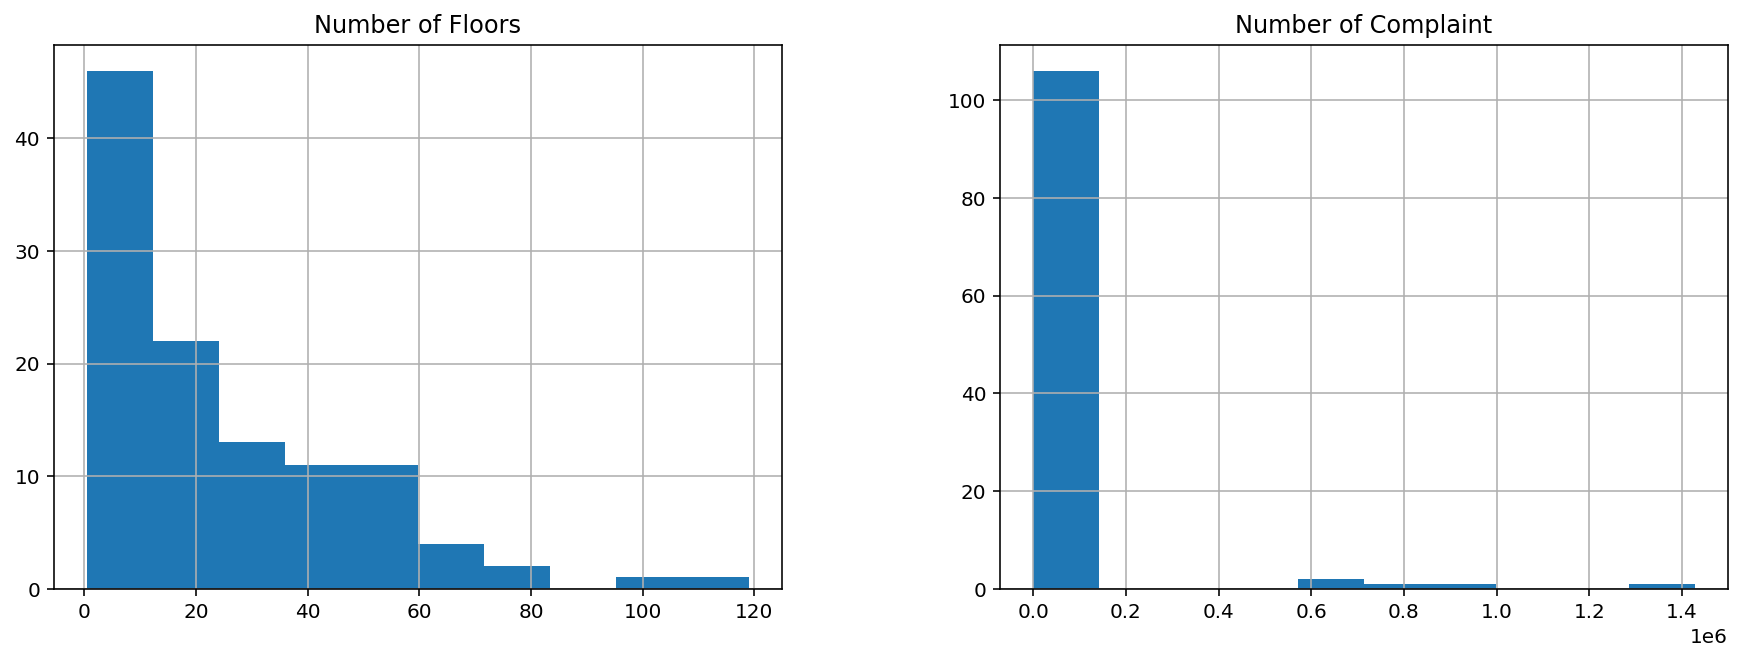

In [85]:
histdf_flor = flr.sorted.hist(figsize=(15,5))

#### We see from the distributions of number of complaints between the different floor numbers, that ther has been a negative correlation between the number of floors and the number of submitted complaints. so, number of floors would be a possible predictive feature to build a model.